# K-means
Demonstration of the k-means algorithm. Here, you can experiment with the k-means algorithm by running it one iteration at at time. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics.pairwise import euclidean_distances
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']

def plot_with_centers(X, y, centers):
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y_kmeans], alpha=.25, s=40)
    ax.scatter(centers[:, 0], centers[:, 1], c=[colors[i] for i in range(K)], marker='+', linewidth=4, s=700)

Let us start by making some random data. We make 3 Gaussian 'blobs', and sample points from them.

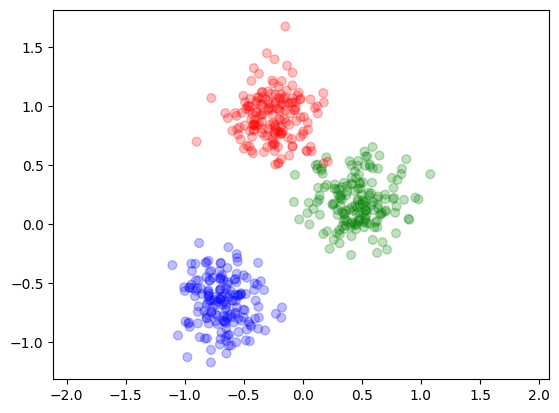

In [26]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=.2, random_state=42, center_box=(-1,1))

# Alternative dataset: Moons
#X, y_true = make_moons(n_samples=100,  noise=0.1, random_state=2)

fig, ax = plt.subplots()
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y_true], alpha=.25, s=40);

Since we have generated the data, we know which cluster each point is from. What if we don't know any of these labels? The K-means algorithm is one simple way of *clustering* data. We start by selecting $K$, the number of clusters we want to fit. Then, let us initialize the center of each of our clusters randomly, so that they don't overlap. Then we plot our centers and for each point, we assign them to the closest center.

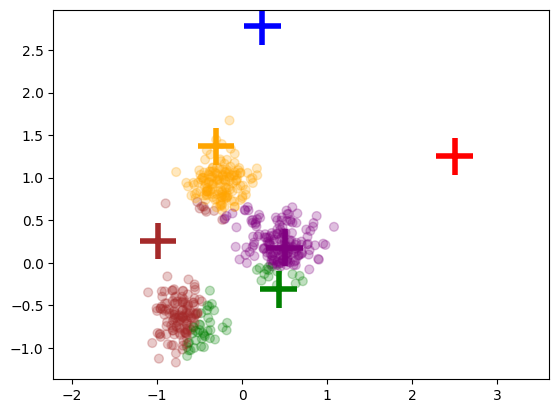

In [27]:
def cluster_assignments(X, Y):
    return np.argmin(euclidean_distances(X,Y), axis=1)

K = 6
centers = np.array([[.5,.5] + np.random.randn(2) for _ in range(K)])
y_kmeans = cluster_assignments(X, centers)

plot_with_centers(X, y_kmeans, centers)

Now we can run our algorithm that fits our cluster centers to the data. In each iteration, we do the two steps:
1. Assign each point to the nearest center
2. Update centers to the mean of their assigned data

Each time you run the code below, one iteration of the above is performed. After some iterations, the centers will stop moving, and our algorithm has converged to a solution.

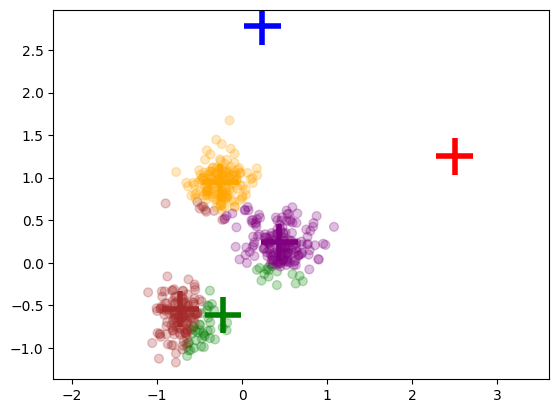

In [28]:
# assign each point to the closest center
y_kmeans = cluster_assignments(X, centers)

# move the centers to the mean of their assigned points (if any)
for i, c in enumerate(centers):
    points = X[y_kmeans == i]
    if len(points):
        centers[i] = points.mean(0)

plot_with_centers(X, y_kmeans, centers)

# Exercises

$\star$ Run the algorithm until convergence. Repeat this several times with different (random) initial cluster means. Does it converge to the correct solution or to a bad local optimum. Discuss how the convergence depends on initial conditions. 

$\star$ Identify where in the code the different steps of the algorithm are performed

$\star$ Discuss the complexity of the algorithm. How does it scale with more samples $N$ and clusters $K$ (in big-O notation) 

$\star$ Try increasing the number of blobs (centers) and their size (cluster_std) in the data set. Experiment with the number of clusters $K$. 

$\star$ We started by generating nice, separated blobs. Uncomment the line in the second cell that defines an alternative data set, and see what happens on that dataset.